In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
#TASK A
#We were extracting features with cv2.goodFeaturesToTrack

In [47]:
img_test = plt.imread("test_1.png")

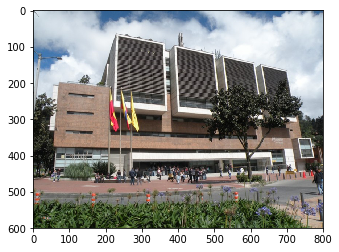

In [48]:
plt.imshow(img_test)

In [49]:
frame_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(frame_gray)
mask[:] = (100)
print(mask)
tracks = []
feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

p = cv2.goodFeaturesToTrack(frame_gray,**feature_params)
if p is not None:
    for x, y in np.float32(p).reshape(-1, 2):
        tracks.append([(x, y)])

[[100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 ...
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]]


In [50]:
for x, y in [np.int32(tr[-1]) for tr in tracks]:
    cv2.circle(img_test, (x, y), 7, 0, -1)

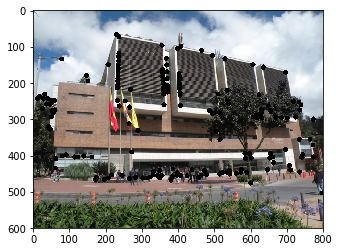

In [51]:
plt.imshow(img_test)

In [53]:
#The black dots are the features detected by the algorithm which are usually features detected by a harris corner detector
#Each  five (5-it is the detect_interval parameter) frames, we extract these features for the fifth frame.
#Once we extract these features for the first fifth frame, with calcOpticalFlowPyrLK() which calculates the optical flow for
#different scales (pyramids) of the features extracted
#To get more accurate points back-tracking is implemented 
# We store the feature points that are the most probable ones that are moving in a tr array

In [54]:
#Each tr element, is a frame and it contains its feature points. 
#Thus we get the tr[-1:] (the last frame) and tr[-2:] (before last) and compare their x positions to see how much they moved. 
# If their x delta (pixels) is negative, it means that the viewer seeing the screen, is seeing the object move to the left
#(but in real life could be the inverse)
#For the movement to be more real, a delta of 12 pixels was used
#Depending on the movement, it is displayed in the screen

In [56]:
#to see this run please run the 
import os 
os.system("python scripts/lk_track.py")

0